# 콘텐츠 기반 필터링

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import time
import re
import csv
import time
import warnings 
import seaborn as sns
import scipy
warnings.filterwarnings("ignore")

data_path='/content/drive/MyDrive/빅데이터 팀플/'
df=pd.read_excel(data_path+'올리브영_세부정보.xlsx')

df

,브랜드,상품명,가격,평가,리뷰수,평균별점,5점,4점,3점,2점,...,발색력3,지속력1,지속력2,지속력3,발림성1,발림성2,발림성3,수분감1,수분감2,수분감3
0,롬앤,[NEW] 롬앤 제로 매트 립스틱,8900.0,최고,8879.0,4.6,0.72,0.19,0.07,0.01,...,다소아쉬워요4%,지속이 오래돼요29%,보통이에요61%,예상보다 짧아요10%,아주 만족해요55%\n,보통이에요37%\n,다소 아쉬워요8%,아주촉촉해요11%,보통이에요45%,매트해요44%
1,롬앤,[NEW] 롬앤 듀이풀 워터 틴트,8900.0,최고,5070.0,4.6,0.74,0.18,0.07,0.01,...,다소아쉬워요6%,지속이 오래돼요27%,보통이에요60%,예상보다 짧아요13%,아주 만족해요67%\n,보통이에요31%\n,다소 아쉬워요2%,아주촉촉해요68%,보통이에요32%,매트해요0%
2,롬앤,[NEW] 롬앤 쥬시 래스팅 틴트,8400.0,최고,25698.0,4.7,0.75,0.19,0.06,0.01,...,다소아쉬워요4%,지속이 오래돼요30%,보통이에요58%,예상보다 짧아요12%,아주 만족해요68%\n,보통이에요30%\n,다소 아쉬워요2%,아주촉촉해요69%,보통이에요31%,매트해요0%
3,바닐라코,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400.0,최고,92.0,4.6,0.76,0.16,0.04,0.02,...,다소아쉬워요9%,지속이 오래돼요41%,보통이에요53%,예상보다 짧아요6%,아주 만족해요67%\n,보통이에요33%\n,다소 아쉬워요1%,아주촉촉해요70%,보통이에요30%,매트해요0%
4,헤라,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000.0,최고,16.0,4.8,0.75,0.25,0.00,0.00,...,다소아쉬워요0%,지속이 오래돼요25%,보통이에요75%,예상보다 짧아요0%,아주 만족해요88%\n,보통이에요13%\n,다소 아쉬워요0%,아주촉촉해요38%,보통이에요38%,매트해요25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,에스쁘아,에스쁘아 꾸뛰르 립틴트 벨벳,20000.0,최고,1925.0,4.6,0.71,0.20,0.07,0.01,...,다소아쉬워요4%,지속이 오래돼요30%,보통이에요55%,예상보다 짧아요15%,아주 만족해요63%\n,보통이에요33%\n,다소 아쉬워요4%,아주촉촉해요22%,보통이에요61%,매트해요17%
57,맥,MAC 파우더 키스 벨벳 블러 슬림 스틱 립스틱,39000.0,최고,17.0,4.6,0.71,0.24,0.06,0.00,...,다소아쉬워요0%,지속이 오래돼요35%,보통이에요59%,예상보다 짧아요6%,아주 만족해요82%\n,보통이에요18%\n,다소 아쉬워요0%,아주촉촉해요29%,보통이에요65%,매트해요6%
58,에뛰드,[민스코PICK] 에뛰드 픽싱 틴트 바,12800.0,최고,618.0,4.4,0.63,0.22,0.10,0.02,...,다소아쉬워요6%,지속이 오래돼요40%,보통이에요49%,예상보다 짧아요12%,아주 만족해요63%\n,보통이에요29%\n,다소 아쉬워요8%,아주촉촉해요20%,보통이에요54%,매트해요26%
59,헤라,헤라 루즈 홀릭 쉬어 매트 3g / 8 color,34000.0,최고,65.0,4.8,0.86,0.11,0.03,0.00,...,다소아쉬워요2%,지속이 오래돼요45%,보통이에요48%,예상보다 짧아요8%,아주 만족해요85%\n,보통이에요15%\n,다소 아쉬워요2%,아주촉촉해요34%,보통이에요57%,매트해요9%


In [ ]:
df2=pd.read_excel(data_path+'df_sum.xlsx')
df2

,Unnamed: 0,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,user_type1,user_type2,user_type3,user_type4,탑리뷰어
0,0.0,0.0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022.08.04,2.0,2.0,3.0,2.0,0,지성,가을웜톤,모공,트러블,0.0
1,1.0,1.0,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022.09.07,2.0,2.0,2.0,3.0,1,NaN,NaN,NaN,NaN,0.0
2,2.0,2.0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022.08.31,2.0,2.0,2.0,1.0,0,민감성,봄웜톤,모공,민감성,0.0
3,3.0,3.0,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022.09.06,2.0,2.0,2.0,2.0,1,NaN,NaN,NaN,NaN,0.0
4,4.0,4.0,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022.10.14,3.0,2.0,3.0,2.0,0,지성,가을웜톤,모공,트러블,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,4684.0,4684.0,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,5.0,2022.10.02,3.0,2.0,3.0,3.0,0,NaN,NaN,NaN,NaN,0.0
4685,4685.0,4685.0,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,5.0,2022.09.26,3.0,1.0,3.0,3.0,0,건성,쿨톤,각질,다크서클,0.0
4686,4686.0,4686.0,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,5.0,2022.09.26,3.0,1.0,3.0,3.0,0,NaN,NaN,NaN,NaN,0.0
4687,4687.0,4687.0,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,5.0,2022.09.24,3.0,2.0,3.0,2.0,0,건성,여름쿨톤,모공,잡티,0.0


# 데이터 전처리

**데이터 전처리**

- 발색력, 지속력, 발림성, 수분감 점수 도출


In [ ]:
df = df.drop('평가',axis = 1)

In [ ]:
df.columns

Index(['브랜드', '상품명', '가격', '리뷰수', '평균별점', '5점', '4점', '3점', '2점', '1점', '발색력1',
       '발색력2', '발색력3', '지속력1', '지속력2', '지속력3', '발림성1', '발림성2', '발림성3', '수분감1',
       '수분감2', '수분감3'],
      dtype='object')

In [ ]:
df['발색력3'] = df['발색력3'].str.extract(r'(\d+)').astype('int')/100
df['발색력2'] = df['발색력2'].str.extract(r'(\d+)').astype('int')/100
df['발색력1'] = df['발색력1'].str.extract(r'(\d+)').astype('int')/100
df['지속력3'] = df['지속력3'].str.extract(r'(\d+)').astype('int')/100
df['지속력2'] = df['지속력2'].str.extract(r'(\d+)').astype('int')/100
df['지속력1'] = df['지속력1'].str.extract(r'(\d+)').astype('int')/100
df['발림성3'] = df['발림성3'].str.extract(r'(\d+)').astype('int')/100
df['발림성2'] = df['발림성2'].str.extract(r'(\d+)').astype('int')/100
df['발림성1'] = df['발림성1'].str.extract(r'(\d+)').astype('int')/100
df['수분감3'] = df['수분감3'].str.extract(r'(\d+)').astype('int')/100
df['수분감2'] = df['수분감2'].str.extract(r'(\d+)').astype('int')/100
df['수분감1'] = df['수분감1'].str.extract(r'(\d+)').astype('int')/100



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드     61 non-null     object 
 1   상품명     61 non-null     object 
 2   가격      61 non-null     float64
 3   리뷰수     61 non-null     float64
 4   평균별점    61 non-null     float64
 5   5점      61 non-null     float64
 6   4점      61 non-null     float64
 7   3점      61 non-null     float64
 8   2점      61 non-null     float64
 9   1점      61 non-null     float64
 10  발색력1    61 non-null     float64
 11  발색력2    61 non-null     float64
 12  발색력3    61 non-null     float64
 13  지속력1    61 non-null     float64
 14  지속력2    61 non-null     float64
 15  지속력3    61 non-null     float64
 16  발림성1    61 non-null     float64
 17  발림성2    61 non-null     float64
 18  발림성3    61 non-null     float64
 19  수분감1    61 non-null     float64
 20  수분감2    61 non-null     float64
 21  수분감3    61 non-null     float64
dtypes: f

In [ ]:
df[:5]

,브랜드,상품명,가격,리뷰수,평균별점,5점,4점,3점,2점,1점,...,발색력3,지속력1,지속력2,지속력3,발림성1,발림성2,발림성3,수분감1,수분감2,수분감3
0,롬앤,[NEW] 롬앤 제로 매트 립스틱,8900.0,8879.0,4.6,0.72,0.19,0.07,0.01,0.01,...,0.04,0.29,0.61,0.10,0.55,0.37,0.08,0.11,0.45,0.44
1,롬앤,[NEW] 롬앤 듀이풀 워터 틴트,8900.0,5070.0,4.6,0.74,0.18,0.07,0.01,0.01,...,0.06,0.27,0.60,0.13,0.67,0.31,0.02,0.68,0.32,0.00
2,롬앤,[NEW] 롬앤 쥬시 래스팅 틴트,8400.0,25698.0,4.7,0.75,0.19,0.06,0.01,0.00,...,0.04,0.30,0.58,0.12,0.68,0.30,0.02,0.69,0.31,0.00
3,바닐라코,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400.0,92.0,4.6,0.76,0.16,0.04,0.02,0.01,...,0.09,0.41,0.53,0.06,0.67,0.33,0.01,0.70,0.30,0.00
4,헤라,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000.0,16.0,4.8,0.75,0.25,0.00,0.00,0.00,...,0.00,0.25,0.75,0.00,0.88,0.13,0.00,0.38,0.38,0.25


In [ ]:
df['발색력점수'] = df['발색력1']*3 + df['발색력2']*2 + df['발색력3']*1
df['지속력점수'] = df['지속력1']*3 + df['지속력2']*2 + df['지속력3']*1
df['발림성점수'] = df['발림성1']*3 + df['발림성2']*2 + df['발림성3']*1
df['수분감점수'] = df['수분감1']*3 + df['수분감2']*2 + df['수분감3']*1

In [ ]:
df[:5]

,브랜드,상품명,가격,리뷰수,평균별점,5점,4점,3점,2점,1점,...,발림성1,발림성2,발림성3,수분감1,수분감2,수분감3,발색력점수,지속력점수,발림성점수,수분감점수
0,롬앤,[NEW] 롬앤 제로 매트 립스틱,8900.0,8879.0,4.6,0.72,0.19,0.07,0.01,0.01,...,0.55,0.37,0.08,0.11,0.45,0.44,2.62,2.19,2.47,1.67
1,롬앤,[NEW] 롬앤 듀이풀 워터 틴트,8900.0,5070.0,4.6,0.74,0.18,0.07,0.01,0.01,...,0.67,0.31,0.02,0.68,0.32,0.00,2.54,2.14,2.65,2.68
2,롬앤,[NEW] 롬앤 쥬시 래스팅 틴트,8400.0,25698.0,4.7,0.75,0.19,0.06,0.01,0.00,...,0.68,0.30,0.02,0.69,0.31,0.00,2.63,2.18,2.66,2.69
3,바닐라코,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400.0,92.0,4.6,0.76,0.16,0.04,0.02,0.01,...,0.67,0.33,0.01,0.70,0.30,0.00,2.54,2.35,2.68,2.70
4,헤라,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000.0,16.0,4.8,0.75,0.25,0.00,0.00,0.00,...,0.88,0.13,0.00,0.38,0.38,0.25,2.81,2.25,2.90,2.15


In [ ]:
df = df[['브랜드','상품명','가격','평균별점','발색력점수','지속력점수','발림성점수','수분감점수']]
df

,브랜드,상품명,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수
0,롬앤,[NEW] 롬앤 제로 매트 립스틱,8900.0,4.6,2.62,2.19,2.47,1.67
1,롬앤,[NEW] 롬앤 듀이풀 워터 틴트,8900.0,4.6,2.54,2.14,2.65,2.68
2,롬앤,[NEW] 롬앤 쥬시 래스팅 틴트,8400.0,4.7,2.63,2.18,2.66,2.69
3,바닐라코,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400.0,4.6,2.54,2.35,2.68,2.70
4,헤라,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000.0,4.8,2.81,2.25,2.90,2.15
...,...,...,...,...,...,...,...,...
56,에스쁘아,에스쁘아 꾸뛰르 립틴트 벨벳,20000.0,4.6,2.63,2.15,2.59,2.05
57,맥,MAC 파우더 키스 벨벳 블러 슬림 스틱 립스틱,39000.0,4.6,2.82,2.29,2.82,2.23
58,에뛰드,[민스코PICK] 에뛰드 픽싱 틴트 바,12800.0,4.4,2.57,2.30,2.55,1.94
59,헤라,헤라 루즈 홀릭 쉬어 매트 3g / 8 color,34000.0,4.8,2.87,2.39,2.87,2.25


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['브랜드'] = le.fit_transform(df['브랜드'])
df['상품id'] = le.fit_transform(df['상품명'])
df[:5]

,브랜드,상품명,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,상품id
0,4,[NEW] 롬앤 제로 매트 립스틱,8900.0,4.6,2.62,2.19,2.47,1.67,12
1,4,[NEW] 롬앤 듀이풀 워터 틴트,8900.0,4.6,2.54,2.14,2.65,2.68,10
2,4,[NEW] 롬앤 쥬시 래스팅 틴트,8400.0,4.7,2.63,2.18,2.66,2.69,13
3,8,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400.0,4.6,2.54,2.35,2.68,2.70,29
4,19,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000.0,4.8,2.81,2.25,2.90,2.15,21


In [ ]:
df2 = pd.read_excel(data_path+'df_sum.xlsx')
df2

,Unnamed: 0,index,user_id,상품명,item_option,user_rank,star,write_date,발색력,지속력,발림성,수분감,올리브영 후기 유무,user_type1,user_type2,user_type3,user_type4,탑리뷰어
0,0.0,0.0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 009 퍼셉션,TOP 375,4.0,2022.08.04,2.0,2.0,3.0,2.0,0,지성,가을웜톤,모공,트러블,0.0
1,1.0,1.0,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022.09.07,2.0,2.0,2.0,3.0,1,NaN,NaN,NaN,NaN,0.0
2,2.0,2.0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 001 베얼리,TOP 207,4.0,2022.08.31,2.0,2.0,2.0,1.0,0,민감성,봄웜톤,모공,민감성,0.0
3,3.0,3.0,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,NaN,NaN,4.0,2022.09.06,2.0,2.0,2.0,2.0,1,NaN,NaN,NaN,NaN,0.0
4,4.0,4.0,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,[옵션] 013 어필,TOP 375,5.0,2022.10.14,3.0,2.0,3.0,2.0,0,지성,가을웜톤,모공,트러블,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,4684.0,4684.0,조조0,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 589,5.0,2022.10.02,3.0,2.0,3.0,3.0,0,NaN,NaN,NaN,NaN,0.0
4685,4685.0,4685.0,복합성쿠로미,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 02 무화과 빛,NaN,5.0,2022.09.26,3.0,1.0,3.0,3.0,0,건성,쿨톤,각질,다크서클,0.0
4686,4686.0,4686.0,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 01 퓨어 레드,TOP 780,5.0,2022.09.26,3.0,1.0,3.0,3.0,0,NaN,NaN,NaN,NaN,0.0
4687,4687.0,4687.0,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,[옵션] 05 핑크 미,NaN,5.0,2022.09.24,3.0,2.0,3.0,2.0,0,건성,여름쿨톤,모공,잡티,0.0


In [ ]:
df2 = df2[['user_id','상품명', 'star','올리브영 후기 유무','user_type1','user_type2','user_type3','user_type4']]
df2[:5]

,user_id,상품명,star,올리브영 후기 유무,user_type1,user_type2,user_type3,user_type4
0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,4.0,0,지성,가을웜톤,모공,트러블
1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,4.0,1,NaN,NaN,NaN,NaN
2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,4.0,0,민감성,봄웜톤,모공,민감성
3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,4.0,1,NaN,NaN,NaN,NaN
4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,5.0,0,지성,가을웜톤,모공,트러블


In [ ]:
data = pd.merge(left = df2, right =df, how = 'left', on = '상품명' )
data[:5]

,user_id,상품명,star,올리브영 후기 유무,user_type1,user_type2,user_type3,user_type4,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,상품id
0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,4.0,0,지성,가을웜톤,모공,트러블,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,4.0,1,NaN,NaN,NaN,NaN,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,4.0,0,민감성,봄웜톤,모공,민감성,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,4.0,1,NaN,NaN,NaN,NaN,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,5.0,0,지성,가을웜톤,모공,트러블,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0


# EDA

In [ ]:
df.isnull().sum()

브랜드      0
상품명      0
가격       0
평균별점     0
발색력점수    0
지속력점수    0
발림성점수    0
수분감점수    0
상품id     0
dtype: int64

- **가격**



In [ ]:
df['가격'].mean()  #평균 가격

17068.688524590165

In [ ]:
df['가격'].min(), df['가격'].max()

(7200.0, 46000.0)

* 평균가격 : 17,068 원
* 최소가격 : 7,200, 최대가격 : 46,000

* **별점**

In [ ]:
df['평균별점'].value_counts() #별점 분포

4.6    27
4.7    17
4.5     6
4.8     5
4.4     4
4.3     1
4.9     1
Name: 평균별점, dtype: int64

In [ ]:
round(df['발색력점수'].var(),4), round(df['지속력점수'].var(),4), round(df['발림성점수'].var(),4), round(df['수분감점수'].var(),4)

(0.011, 0.0217, 0.01, 0.1394)

- 발색력은 분산 값 작음. 

In [ ]:
df['발색력점수'].mean() #발색력 평균

2.6342622950819665

In [ ]:
df['발색력점수'].min(), df['발색력점수'].max() #발색력 최소, 최대

(2.3800000000000003, 2.94)

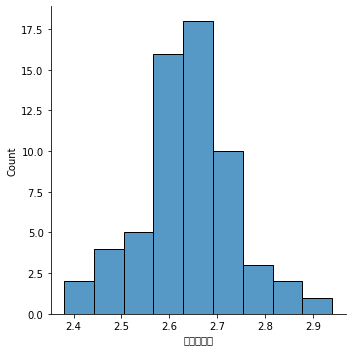

In [ ]:
import seaborn as sns
sns.displot(df['발색력점수'])

In [ ]:
df['지속력점수'].mean() #지속력 평균

2.2693442622950815

In [ ]:
df['지속력점수'].min(), df['지속력점수'].max() #지속력 최소, 최대

(1.91, 2.8099999999999996)

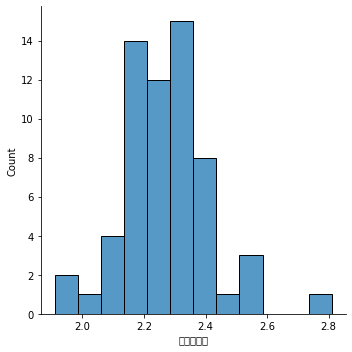

In [ ]:
sns.displot(df['지속력점수'])

In [ ]:
df['발림성점수'].mean() # 발림성 평균

2.63672131147541

In [ ]:
df['발림성점수'].min(), df['발림성점수'].max() #발림성 최소, 최대

(2.4, 2.94)

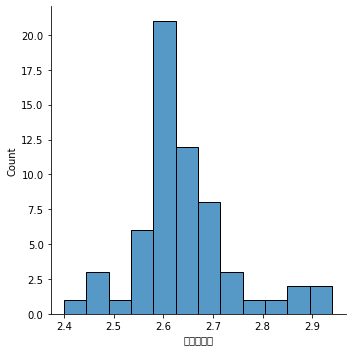

In [ ]:
sns.displot(df['발림성점수'])

In [ ]:
df['수분감점수'].mean()  #수분감 평균

2.264098360655738

In [ ]:
df['수분감점수'].min(), df['수분감점수'].max() #수분감 최소, 최대

(1.67, 2.91)

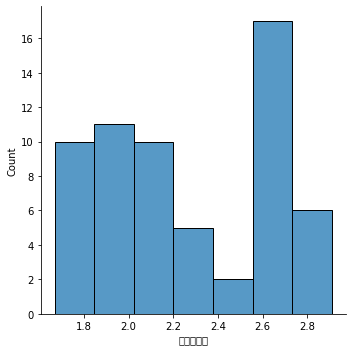

In [ ]:
sns.displot(df['수분감점수'])

# 모델 생성


### 콘텐츠 기반 추천

#### 제품 유사도 측정


In [ ]:
df[:5]

,브랜드,상품명,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,상품id
0,4,[NEW] 롬앤 제로 매트 립스틱,8900.0,4.6,2.62,2.19,2.47,1.67,12
1,4,[NEW] 롬앤 듀이풀 워터 틴트,8900.0,4.6,2.54,2.14,2.65,2.68,10
2,4,[NEW] 롬앤 쥬시 래스팅 틴트,8400.0,4.7,2.63,2.18,2.66,2.69,13
3,8,[소봉 공동개발] 바닐라코 글로우 베일 틴트 3.8g / 5colors,12400.0,4.6,2.54,2.35,2.68,2.70,29
4,19,[NEW] 헤라 센슈얼 파우더 매트 립스틱 3g / 7 color (+네일세트/파우...,34000.0,4.8,2.81,2.25,2.90,2.15,21


* 유사도 feature = 발색력, 지속력, 발림성, 수분감

In [ ]:
feature = df[['가격','발색력점수','지속력점수','발림성점수','수분감점수']]
feature

,가격,발색력점수,지속력점수,발림성점수,수분감점수
0,8900.0,2.62,2.19,2.47,1.67
1,8900.0,2.54,2.14,2.65,2.68
2,8400.0,2.63,2.18,2.66,2.69
3,12400.0,2.54,2.35,2.68,2.70
4,34000.0,2.81,2.25,2.90,2.15
...,...,...,...,...,...
56,20000.0,2.63,2.15,2.59,2.05
57,39000.0,2.82,2.29,2.82,2.23
58,12800.0,2.57,2.30,2.55,1.94
59,34000.0,2.87,2.39,2.87,2.25


* 값 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature['가격'] = scaler.fit_transform(feature[['가격']])
feature['발색력점수'] = scaler.fit_transform(feature[['발색력점수']])
feature['지속력점수'] = scaler.fit_transform(feature[['지속력점수']])
feature['발림성점수'] = scaler.fit_transform(feature[['발림성점수']])
feature['수분감점수'] = scaler.fit_transform(feature[['수분감점수']])


* 유사도 계산

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

feature_sim = cosine_similarity(feature, feature)
print(feature_sim.shape)
print(feature_sim[:2])

(61, 61)
[[1.         0.47614769 0.58181448 0.55796722 0.73297478 0.96607193
  0.89998627 0.19928071 0.6054027  0.88642196 0.82848711 0.94299289
  0.93197838 0.9454967  0.65269698 0.63061703 0.78216903 0.94637818
  0.82533049 0.43576969 0.90171615 0.72789037 0.95353929 0.89719086
  0.92111417 0.54465776 0.87638283 0.8104203  0.87615901 0.76958682
  0.85664081 0.96203303 0.55163452 0.51146365 0.83677322 0.58427859
  0.64217314 0.6531773  0.48336099 0.53918572 0.63778556 0.78711026
  0.94855798 0.75315092 0.67845065 0.7953443  0.95443659 0.54286413
  0.59515935 0.09488419 0.4609012  0.79549616 0.44504985 0.33038084
  0.33038084 0.95207863 0.79116104 0.7329091  0.88074449 0.79035311
  0.52625181]
 [0.47614769 1.         0.99021279 0.9782966  0.72266889 0.60110739
  0.64915207 0.94337103 0.96880956 0.81856603 0.81025677 0.56008676
  0.60888438 0.62356281 0.95385773 0.9755397  0.66303516 0.68194327
  0.84668297 0.99085591 0.66902678 0.86279454 0.67235025 0.74862791
  0.71115634 0.98530924 0

In [ ]:
feature_sim_sorted_ind = feature_sim.argsort()[:, ::-1]
print(feature_sim_sorted_ind[:1])

[[ 0  5 31 46 22 55 42 17 13 11 12 24 20  6 23  9 58 26 28 30 34 10 18 27
  51 45 56 59 41 16 29 43  4 57 21 44 37 14 36 40 15  8 48 35  2  3 32 25
  47 39 60 33 38  1 50 52 19 54 53  7 49]]


##### 모델 생성 및 추천 
* 활용특징 : 가격, 발색력점수, 지속력점수, 발림성점수, 수분감점수

In [ ]:
### 활용한 특징 : 가격, 발색력점수, 지속력점수, 발림성점수, 수분감점수


def find_sim_cosmetic(df, sorted_ind, 상품명, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_cosmetic = df[df['상품명'] == 상품명]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_cosmetic.index.values #타이틀로 가져오기 위함
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]


* 추천

In [ ]:
similar_cosmetic = find_sim_cosmetic(df, feature_sim_sorted_ind, '[NEW] 클리오 쉬폰무드립',10)
similar_cosmetic[['상품명', '평균별점','가격','발색력점수','지속력점수','발림성점수','수분감점수']]

[[12 42 11 13  5 23 22  6 28 17]]


,상품명,평균별점,가격,발색력점수,지속력점수,발림성점수,수분감점수
12,[NEW] 클리오 쉬폰무드립,4.6,14300.0,2.67,2.15,2.58,1.75
42,힌스 무드 인핸서 마뜨,4.7,14440.0,2.73,2.23,2.61,1.77
11,3CE 소프트 매트 립스틱,4.7,15200.0,2.71,2.20,2.60,1.70
13,[NEW] 페리페라 잉크무드 매트스틱 (도토리컬렉션 NEW COLOR),4.7,12000.0,2.63,2.20,2.58,1.74
5,[NEW] 롬앤 블러 퍼지 틴트,4.7,9900.0,2.71,2.25,2.60,1.74
23,3CE 벨벳 립 틴트,4.6,15000.0,2.71,2.27,2.66,1.96
22,[NEW] 웨이크메이크 벨벳 블러링 픽싱 틴트 8colors,4.6,10900.0,2.67,2.26,2.59,1.82
6,[NEW] 무지개맨션 오브제 리퀴드,4.7,18000.0,2.63,2.18,2.54,1.83
28,[NEW COLOR]클리오 쉬폰블러틴트,4.7,18000.0,2.67,2.30,2.68,1.87
17,롬앤 제로 벨벳 틴트,4.6,8400.0,2.70,2.25,2.61,1.84


평점 기반

In [ ]:
data #왼쪽은 고객데이터/ 오른쪽은 제품 데이터

,user_id,상품명,star,올리브영 후기 유무,user_type1,user_type2,user_type3,user_type4,브랜드,가격,평균별점,발색력점수,지속력점수,발림성점수,수분감점수,상품id
0,체리브영,[NEW] 무지개맨션 오브제 리퀴드,4.0,0,지성,가을웜톤,모공,트러블,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
1,꽁딩이,[NEW] 무지개맨션 오브제 리퀴드,4.0,1,NaN,NaN,NaN,NaN,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
2,체리브영,[NEW] 무지개맨션 오브제 리퀴드,4.0,0,민감성,봄웜톤,모공,민감성,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
3,올영은콩다콩,[NEW] 무지개맨션 오브제 리퀴드,4.0,1,NaN,NaN,NaN,NaN,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
4,플랑플랑,[NEW] 무지개맨션 오브제 리퀴드,5.0,0,지성,가을웜톤,모공,트러블,7.0,18000.0,4.7,2.63,2.18,2.54,1.83,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,ks****,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,5.0,0,NaN,NaN,NaN,NaN,15.0,10900.0,4.4,2.45,2.08,2.54,2.60,18.0
4864,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,5.0,0,건성,여름쿨톤,모공,잡티,15.0,10900.0,4.4,2.45,2.08,2.54,2.60,18.0
4865,efffsd,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,5.0,0,건성,여름쿨톤,모공,잡티,15.0,10900.0,4.4,2.45,2.08,2.54,2.60,18.0
4866,ewegr,[NEW] 웨이크메이크 워터 컬러링 퓨어 틴트 6color,5.0,0,NaN,NaN,NaN,NaN,15.0,10900.0,4.4,2.45,2.08,2.54,2.60,18.0


In [ ]:
# 영화별로 평점과 평점개수를 계산합니다
ratings_mean_count = data.groupby("상품명").agg({"star": ["mean", "count"]})
ratings_mean_count.columns = ["ratings_mean", "ratings_count"]
# 평점은 소수점 2자리에서 반올림해줍니다.
ratings_mean_count.ratings_mean = ratings_mean_count.ratings_mean.round(2)
ratings_mean_count

,ratings_mean,ratings_count
상품id,,
0.0,4.60,90
1.0,4.68,90
3.0,4.63,90
7.0,4.49,90
8.0,4.48,90
10.0,4.69,90
11.0,4.57,90
12.0,4.59,90
13.0,4.70,90
